In [1]:
import tensorflow as tf

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
# create interactive session
sess = tf.InteractiveSession()

In [5]:
# read image using TF
fn = '8.png'
image_contents = tf.read_file(fn)
image = tf.image.decode_image(image_contents, channels=3)
image = tf.image.resize_image_with_crop_or_pad(image, 250, 250)
image.shape
# image = tf.constant(image.eval())
# image
# print(image.eval().shape)
# print(image.eval())

TensorShape([Dimension(250), Dimension(250), Dimension(None)])

In [6]:
img_resize = tf.image.resize_images(image, [28,28])
img_resize
# print(img_r.eval())


<tf.Tensor 'Squeeze:0' shape=(28, 28, 1) dtype=float32>

[26.87756, 153.85715]
[0.0, 1.0, 0.80202973]


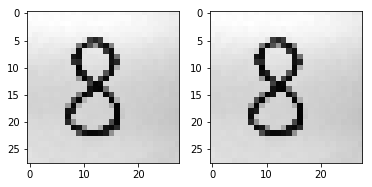

In [7]:
# show standardized image
# use naive method
img_max = tf.reduce_max(img_resize)
img_min = tf.reduce_min(img_resize)
print ([img_min.eval(), img_max.eval()])

std_img = tf.div( tf.subtract( img_resize, img_min), tf.subtract(img_max, img_min) )
print ([tf.reduce_min(std_img).eval(), tf.reduce_max(std_img).eval(),  tf.reduce_mean(std_img).eval()])

fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_resize.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(std_img.eval()[:,:,0], cmap = 'gray')

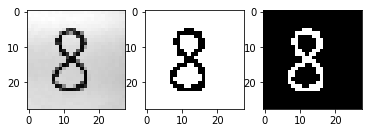

In [8]:
# show binarized image
# use naive method (the contrast adjustment in TF is not useful)

# then inverse the image

bin_img = tf.ceil( tf.subtract(std_img, 0.7) )

inv_img = tf.abs( tf.subtract(bin_img, 1) )

fig = plt.figure()
a=fig.add_subplot(1,3,1)
imgplot = plt.imshow(img_resize.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,3,2)
imgplot = plt.imshow(bin_img.eval()[:,:,0], cmap = 'gray')
a=fig.add_subplot(1,3,3)
imgplot = plt.imshow(inv_img.eval()[:,:,0], cmap = 'gray')

In [10]:
# reshape img tensor to vector
input_img = tf.reshape(inv_img, [1, 784])
# print input_img.eval()

In [11]:
sess.close()

In [12]:
# it works in terminal, but not in notebook
x = tf.placeholder(tf.float32, [None, 784], name="input")
W = tf.Variable(tf.zeros([784, 10]), name = "w1")
b = tf.Variable(tf.zeros([10]), name = "b1")
y = tf.nn.softmax(tf.matmul(x, W) + b)

# swd--save the Checkpoint file
saver = tf.train.Saver()
with tf.Session() as sess:
    # swd save ckpt
    saver.restore(sess, "saved_model/model.ckpt")
    print("Model restored.")
    np.set_printoptions(precision = 2)
#     result=sess.run(y,feed_dict={x: img})
    result=sess.run(y,  feed_dict={x: input_img.eval()})
    print(result)
    print('The number is: '+str(np.argmax(result)))
    


Model restored.
[[  1.67e-03   6.44e-05   3.34e-02   4.64e-02   3.74e-03   7.05e-02
    7.17e-03   6.56e-05   6.71e-01   1.66e-01]]
The number is: 8


In [1]:
import tensorflow as tf

In [2]:
sess = tf.InteractiveSession()

In [3]:
# read image 
fn = '8.png'
image_contents = tf.read_file(fn)
image = tf.image.decode_image(image_contents, channels=1)

image

<tf.Tensor 'decode_image/cond_jpeg/Merge:0' shape=<unknown> dtype=uint8>

In [6]:
image.shape

TensorShape(None)

In [9]:
image.eval().shape

(250, 250, 1)

In [10]:
img_resize = tf.image.resize_images(image, [28,28])

ValueError: 'images' contains no shape.